# Set Up and Declare Files

https://github.com/djangraw/ParseEyeLinkAscFiles

In [2]:
import os
os.getcwd()

'c:\\Users\\Ailene\\OneDrive - California Institute of Technology\\Documents\\GitHub\\blindspot-multisensory\\Data\\edf'

In [3]:
# ParseEyeLinkAsc_script.ipynp
#
# Created 8/15/18 by DJ.
# Modified by AC for data analysis

# Import packages
import os
import pandas as pd
import time
from ParseEyeLinkAsc import ParseEyeLinkAsc

dataDir = os.path.join(os.getcwd(), 'asc')
twoLevelsUpDir = os.path.dirname(os.path.dirname(os.getcwd()))
plotDir = os.path.join(twoLevelsUpDir, 'plots', 'eyelink')
# print(plotDir)
ascFiles = [file for file in os.listdir(dataDir) if file.endswith('.asc')]
# print(ascFiles)

outDir = os.path.join(dataDir, 'ParseEyeLinkAsc')
if not os.path.exists(outDir):
    os.makedirs(outDir)

# Load Data into Pandas Dataframes

In [3]:
parseFiles = False

In [4]:
# Navigate to data directory
os.chdir(dataDir)
# Load file in
if parseFiles:
    for elFilename in ascFiles:
        # print(elFilename)
        dfTrial,dfMsg,dfFix,dfSacc,dfBlink,dfSamples = ParseEyeLinkAsc(elFilename)
        print('Saving results...')
        t = time.time()
        # Get file prefix from original filename
        elFileStart = os.path.splitext(elFilename)[0]
        print(elFileStart)

        # Make master list of dataframes to write
        allDataFrames = [dfTrial,dfMsg,dfFix,dfSacc,dfBlink,dfSamples] # the dataframes
        allNames = ['Trial','Message','Fixation','Saccade','Blink','Sample'] # what they're called
        # Write dataframes to .csv files
        for i in range(len(allNames)):
            outFilename = '%s/%s_%s.csv'%(outDir,elFileStart,allNames[i])
            print('   Saving %s output as %s...'%(allNames[i],outFilename))
            allDataFrames[i].to_csv(outFilename,float_format='%.1f',index=False)
        print('Done! Took %f seconds.'%(time.time()-t))

In [4]:
import os
import shutil

# Go through *_Message files and extract number of trials
msgFiles = [file for file in os.listdir(outDir) if file.endswith('Message.csv')]
fileList = []
nTrials = []
for msgFile in msgFiles:
    df = pd.read_csv(os.path.join(outDir,msgFile))
    # print(df)
    fileList.append(msgFile.split('_Message')[0])
    nTrials.append(sum('TRIAL_END' in text for text in df['text']))
    # print(f"file: {fileList[-1]}, nTrials: {nTrials[-1]}")

    dump_folder = os.path.join(outDir, 'dump')
    if not os.path.exists(dump_folder):
        os.makedirs(dump_folder)

    if nTrials[-1] == 0:
        print(fileList[-1] + ' has no trials! Moving to dump folder...')
        dumpFiles = [file for file in os.listdir(outDir) if file.startswith(fileList[-1])]
        for file in dumpFiles:
            shutil.move(os.path.join(outDir, file), os.path.join(dump_folder, file))
        

data = pd.DataFrame.from_dict({'File': fileList, 'nTrials': nTrials})
data.to_csv(os.path.join(outDir, 'allSub_nTrials.csv'), index=False)

## Get Gaze Data

In [6]:
## Generate time stamps of fixation, stim and resp data
# Messages to look for: FIX_START, FIX_END, FIX_FAILED, FIX_SUCCEED
# Files needed: *_Message.csv, *_Sample.csv
import os
import numpy as np

keys = ['trialID', 'fixStart', 'fixEnd', 'fixFailed', 'fixSucceed', 'stimStart','stimEnd','respStart','respEnd']
msgFiles = [file for file in os.listdir(outDir) if file.endswith('Message.csv')]

for msgFile in msgFiles:
    timeStamps = pd.DataFrame(columns=keys)
    df = pd.read_csv(os.path.join(outDir,msgFile))
    # print(df)
    # timeStamps['file'] = msgFile.split('_Message')[0]
    timeStamps['trialID'] = pd.Series([df['text'][index].split('TRIALID ')[1] for index, text in enumerate(df['text']) if 'TRIALID' in text])
    timeStamps['fixStart'] = pd.Series([df['time'][index] for index, text in enumerate(df['text']) if 'FIX_START' in text])
    timeStamps['fixEnd'] = pd.Series([df['time'][index] for index, text in enumerate(df['text']) if 'FIX_END' in text])
    timeStamps['fixFailed'] = pd.Series([df['time'][index] for index, text in enumerate(df['text']) if 'FIX_FAILED' in text])
    timeStamps['fixSucceed'] = pd.Series([df['time'][index] for index, text in enumerate(df['text']) if 'FIX_SUCCEED' in text])
    timeStamps['stimStart'] = pd.Series([df['time'][index] for index, text in enumerate(df['text']) if 'STIM_START' in text])
    timeStamps['stimEnd'] = pd.Series([df['time'][index] for index, text in enumerate(df['text']) if 'STIM_END' in text])
    timeStamps['respStart'] = pd.Series([df['time'][index] for index, text in enumerate(df['text']) if 'RESP_START' in text])
    timeStamps['respEnd'] = pd.Series([df['time'][index] for index, text in enumerate(df['text']) if 'RESP_END' in text])
    timeStamps.to_csv(os.path.join(outDir, msgFile.split('_Message')[0] + '_timeStamps.csv'), index=False)



C:\Users\Ailene\AppData\Local\Temp\ipykernel_32252\1794645936.py:18: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  timeStamps['fixFailed'] = pd.Series([df['time'][index] for index, text in enumerate(df['text']) if 'FIX_FAILED' in text])
C:\Users\Ailene\AppData\Local\Temp\ipykernel_32252\1794645936.py:19: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  timeStamps['fixSucceed'] = pd.Series([df['time'][index] for index, text in enumerate(df['text']) if 'FIX_SUCCEED' in text])
C:\Users\Ailene\AppData\Local\Temp\ipykernel_32252\1794645936.py:18: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  timeStamps['fixFailed'] = pd.Series([df['time'][index] for

In [7]:
import matplotlib.pyplot as plt

def getNormXYarray(x, y):
    resolution = (3840, 2160)
    xCenter = resolution[0] / 2
    yCenter = resolution[1] / 2
    
    xNorm = x - xCenter
    yNorm = y - yCenter
    return pixelToDegree(xNorm), pixelToDegree(yNorm)

def getNormDistFromCenter(x, y):
    resolution = (3840, 2160)
    xCenter = resolution[0] / 2
    yCenter = resolution[1] / 2

    xNorm = x - xCenter
    yNorm = y - yCenter

    # Ensure xNorm and yNorm are numpy arrays
    xNorm = np.array(xNorm, dtype=float)
    yNorm = np.array(yNorm, dtype=float)
    
    # Identify NaN values
    if np.isnan(xNorm).any() or np.isnan(yNorm).any():
        # print("NaN values found in the input arrays")
        # Handle NaN values (e.g., replace with zero)
        xNorm = np.nan_to_num(xNorm)
        yNorm = np.nan_to_num(yNorm)
    
    return pixelToDegree(np.sqrt(xNorm**2 + yNorm**2))

def plotSeries(x,y,title):
    mean_x = np.mean(x, axis=0)
    mean_y = np.mean(y, axis=0)
    std_x = np.std(x, axis=0)
    std_y = np.std(y, axis=0)

    # X-axis values (time or sample index)
    x_values = np.arange(mean_x.size)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, mean_x, label='Horizontal', color = 'magenta')
    plt.fill_between(x_values, mean_x - std_x, mean_x + std_x, color='magenta', alpha=0.5)
    plt.plot(x_values, mean_y, label='Vertical', color = 'turquoise')
    plt.fill_between(x_values, mean_y - std_y, mean_y + std_y, color='turquoise', alpha=0.5)

    plt.ylim(-.05, .05)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Distance from center (deg)')
    plt.legend()
    plt.show()

def plotSeries_combined(fixX, fixY, stimX, stimY, respX, respY, title):
    mean_fixX = np.mean(fixX, axis=0)
    mean_fixY = np.mean(fixY, axis=0)
    std_fixX = np.std(fixX, axis=0)
    std_fixY = np.std(fixY, axis=0)

    mean_stimX = np.mean(stimX, axis=0)
    mean_stimY = np.mean(stimY, axis=0)
    std_stimX = np.std(stimX, axis=0)
    std_stimY = np.std(stimY, axis=0)

    mean_respX = np.mean(respX, axis=0)
    mean_respY = np.mean(respY, axis=0)
    std_respX = np.std(respX, axis=0)
    std_respY = np.std(respY, axis=0)

    x_values = np.arange(mean_fixX.size+mean_stimX.size+mean_respX.size)

    plt.figure(figsize=(10, 6))
    plt.plot(x_values, np.concatenate((mean_fixX, mean_stimX, mean_respX)), label='Horizontal', color = 'magenta')
    plt.fill_between(x_values, np.concatenate((mean_fixX - std_fixX, mean_stimX - std_stimX, mean_respX - std_respX)), np.concatenate((mean_fixX + std_fixX, mean_stimX + std_stimX, mean_respX + std_respX)), color='magenta', alpha=0.5)
    plt.plot(x_values, np.concatenate((mean_fixY, mean_stimY, mean_respY)), label='Vertical', color = 'turquoise')
    plt.fill_between(x_values, np.concatenate((mean_fixY - std_fixY, mean_stimY - std_stimY, mean_respY - std_respY)), np.concatenate((mean_fixY + std_fixY, mean_stimY + std_stimY, mean_respY + std_respY)), color='turquoise', alpha=0.5)

    # add dotted line to indicate stimulus onset and offset
    plt.axvline(x=mean_fixX.size, color='black', linestyle='dotted')
    plt.axvline(x=mean_fixX.size+mean_stimX.size, color='black', linestyle='dotted')

    plt.ylim(-.05, .05)
    plt.xticks([])
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Distance from center (deg)')
    plt.legend()

    # save figure
    # plt.savefig(os.path.join(outDir, 'plot', title + '.png'))

    plt.show()

def plotSeries_combined_dist_from_center(fix, stim, resp, eye, color):
    mean_fix = np.mean(fix, axis=0)
    std_fix = np.std(fix, axis=0)

    mean_stim = np.mean(stim, axis=0)
    std_stim = np.std(stim, axis=0)

    mean_resp = np.mean(resp, axis=0)
    std_resp = np.std(resp, axis=0)

    x_values = np.arange(mean_fix.size+mean_stim.size+mean_resp.size)

    plt.figure(figsize=(10, 6))
    plt.plot(x_values, np.concatenate((mean_fix, mean_stim, mean_resp)), label=eye, color=color)
    plt.fill_between(x_values, np.concatenate((mean_fix - std_fix, mean_stim - std_stim, mean_resp - std_resp)), np.concatenate((mean_fix + std_fix, mean_stim + std_stim, mean_resp + std_resp)), color='magenta', alpha=0.5)
    

def pixelToDegree(pix):
    resolution = (3840, 2160)
    screen_width = 600 # mm
    viewing_dist = 570 # mm
    pixel_size = screen_width / resolution[0]
    return 2 * np.arctan(pix * pixel_size / (2 * viewing_dist))


In [8]:
def getXYarray(ts_df, samp_df, nSamps, keywords, eye):

    x = [] #np.zeros((ts_df['trialID'].size, nSamps))
    y = [] #np.zeros((ts_df['trialID'].size, nSamps))

    # Skip the last 8 rows in ts_df
    ts_df = ts_df[:-8]

    for index, row in ts_df.iterrows():
       
        samples = samp_df[(samp_df['tSample'] >= row[keywords[0]]) & (samp_df['tSample'] < row[keywords[1]])]     
        samples = samples[-nSamps:]
       
        x.append(samples[eye+'X'].values)        
        y.append(samples[eye+'Y'].values)

    # Find the minimum length of the arrays
    min_length = min(len(arr) for arr in x)

    # Truncate the arrays to the minimum length, keeping the last 'min_length' entries
    x_truncated = np.array([arr[-min_length:] for arr in x])
    y_truncated = np.array([arr[-min_length:] for arr in y])
    
    # Debugging output
    # print(f"x_array shape: {x_truncated.shape}")
    # print(f"y_array shape: {y_truncated.shape}")
   
    return x_truncated, y_truncated


In [9]:
import numpy as np

subjectIDs = list(set([file.split('L_')[0] for file in os.listdir(outDir) if file.endswith('Message.csv') and 'L' in file]))

for sid in subjectIDs:
    plt.figure(figsize=(10, 6))
                  
    for eye, color in zip(['L', 'R'], ['magenta', 'turquoise']):  
        timeStampFiles = [file for file in os.listdir(outDir) if file.endswith('timeStamps.csv') and sid + eye in file]
        sampFiles = [file for file in os.listdir(outDir) if file.endswith('Sample.csv') and sid + eye in file]
        print(f"Processing {eye} eye for subject {sid}")
        print(f"Found sampFiles: {sampFiles}")

        if len(timeStampFiles) == 1:
            ts_df = pd.read_csv(os.path.join(outDir, timeStampFiles[0]))
            samp_df = pd.read_csv(os.path.join(outDir, sampFiles[0]))            
        else:
            for ts_file in timeStampFiles:
                # skip if number of trials == 8
                ts_df = pd.read_csv(os.path.join(outDir, ts_file))
                if ts_df['trialID'].size == 8:
                    continue
                else:
                    sampFile = [file for file in sampFiles if ts_file.split('_timeStamps')[0] in file][0]
                    samp_df = pd.read_csv(os.path.join(outDir, sampFile))
        

        # Fixation duration = 500ms, recorded at 500 Hz, monocular viewing -> every other sample -> 125 samples
        fix_samps_x, fix_samps_y = getXYarray(ts_df, samp_df, 100, ['fixStart', 'fixEnd'], eye)        
        stim_samps_x, stim_samps_y = getXYarray(ts_df, samp_df, 62, ['stimStart', 'stimEnd'], eye)
        resp_samps_x, resp_samps_y = getXYarray(ts_df, samp_df, 100, ['respStart', 'respEnd'], eye)
        
        fix = getNormDistFromCenter(fix_samps_x, fix_samps_y)
        stim = getNormDistFromCenter(stim_samps_x, stim_samps_y)
        resp = getNormDistFromCenter(resp_samps_x, resp_samps_y)

        # plotSeries_combined_dist_from_center(fix, stim, resp, eye, color)
        mean_fix = np.mean(fix, axis=0)
        std_fix = np.std(fix, axis=0)

        mean_stim = np.mean(stim, axis=0)
        std_stim = np.std(stim, axis=0)

        mean_resp = np.mean(resp, axis=0)
        std_resp = np.std(resp, axis=0)

        x_values = np.arange(mean_fix.size+mean_stim.size+mean_resp.size)

        plt.plot(x_values, np.concatenate((mean_fix, mean_stim, mean_resp)), label=eye, color=color)
        plt.fill_between(x_values, np.concatenate((mean_fix - std_fix, mean_stim - std_stim, mean_resp - std_resp)), np.concatenate((mean_fix + std_fix, mean_stim + std_stim, mean_resp + std_resp)), color=color, alpha=0.5)
        

    ymin = -.03
    ymax = .2
    plt.ylim(ymin, ymax)
    # Add dotted lines to indicate stimulus onset and offset
    plt.axvline(x=mean_fix.size, color='black', linestyle='dotted')
    plt.axvline(x=mean_fix.size + mean_stim.size, color='black', linestyle='dotted')
    plt.axhline(y=0, color='black', linestyle=':')
    x_offset = -14
    y_offset = ymin+0.005
    plt.text(mean_fix.size+x_offset, y_offset, 'Stim ON', color='black', fontsize=12)
    plt.text(mean_fix.size+mean_stim.size+x_offset, y_offset, 'Stim OFF', color='black', fontsize=12)

    x_offset = 10
    y_offset = ymax-.01
    plt.text(0+x_offset, y_offset, 'Fixation', color='black', fontsize=12)
    plt.text(mean_fix.size+x_offset, y_offset, 'Stimulus', color='black', fontsize=12)
    plt.text(mean_fix.size+mean_stim.size+x_offset, y_offset, 'Response', color='black', fontsize=12)

    plt.xlim(left=0, right=mean_fix.size+mean_stim.size+mean_resp.size)
    plt.xticks([])
    plt.title(sid, fontsize=16)
    plt.xlabel('Time', fontsize=16) #, rotation=270)
    plt.ylabel('Gaze distance from fixation cross (deg)', fontsize=16) #, rotation=270, labelpad=20)
    plt.legend(loc='lower left')

    # save figure
    plt.savefig(os.path.join(plotDir, 'indiv', sid + '.png'))
    # plt.show()
    plt.close()



Processing L eye for subject SV018
Found sampFiles: ['SV018L_02-05-2024 11_29_06_Sample.csv']
Processing R eye for subject SV018
Found sampFiles: ['SV018R_02-05-2024 10_55_13_Sample.csv']
Processing L eye for subject SV019
Found sampFiles: ['SV019L_02-05-2024 14_56_22_Sample.csv']
Processing R eye for subject SV019
Found sampFiles: ['SV019R_02-05-2024 14_23_47_Sample.csv']
Processing L eye for subject SV032
Found sampFiles: ['SV032L_12-08-2024 15_36_15_Sample.csv']
Processing R eye for subject SV032
Found sampFiles: ['SV032R_12-08-2024 15_05_51_Sample.csv']
Processing L eye for subject SV024
Found sampFiles: ['SV024L_06-05-2024 15_05_54_Sample.csv']
Processing R eye for subject SV024
Found sampFiles: ['SV024R_06-05-2024 15_39_14_Sample.csv']
Processing L eye for subject SV020
Found sampFiles: ['SV020L_03-05-2024 12_05_52_Sample.csv']
Processing R eye for subject SV020
Found sampFiles: ['SV020R_03-05-2024 11_27_37_Sample.csv']
Processing L eye for subject SV030
Found sampFiles: ['SV030L

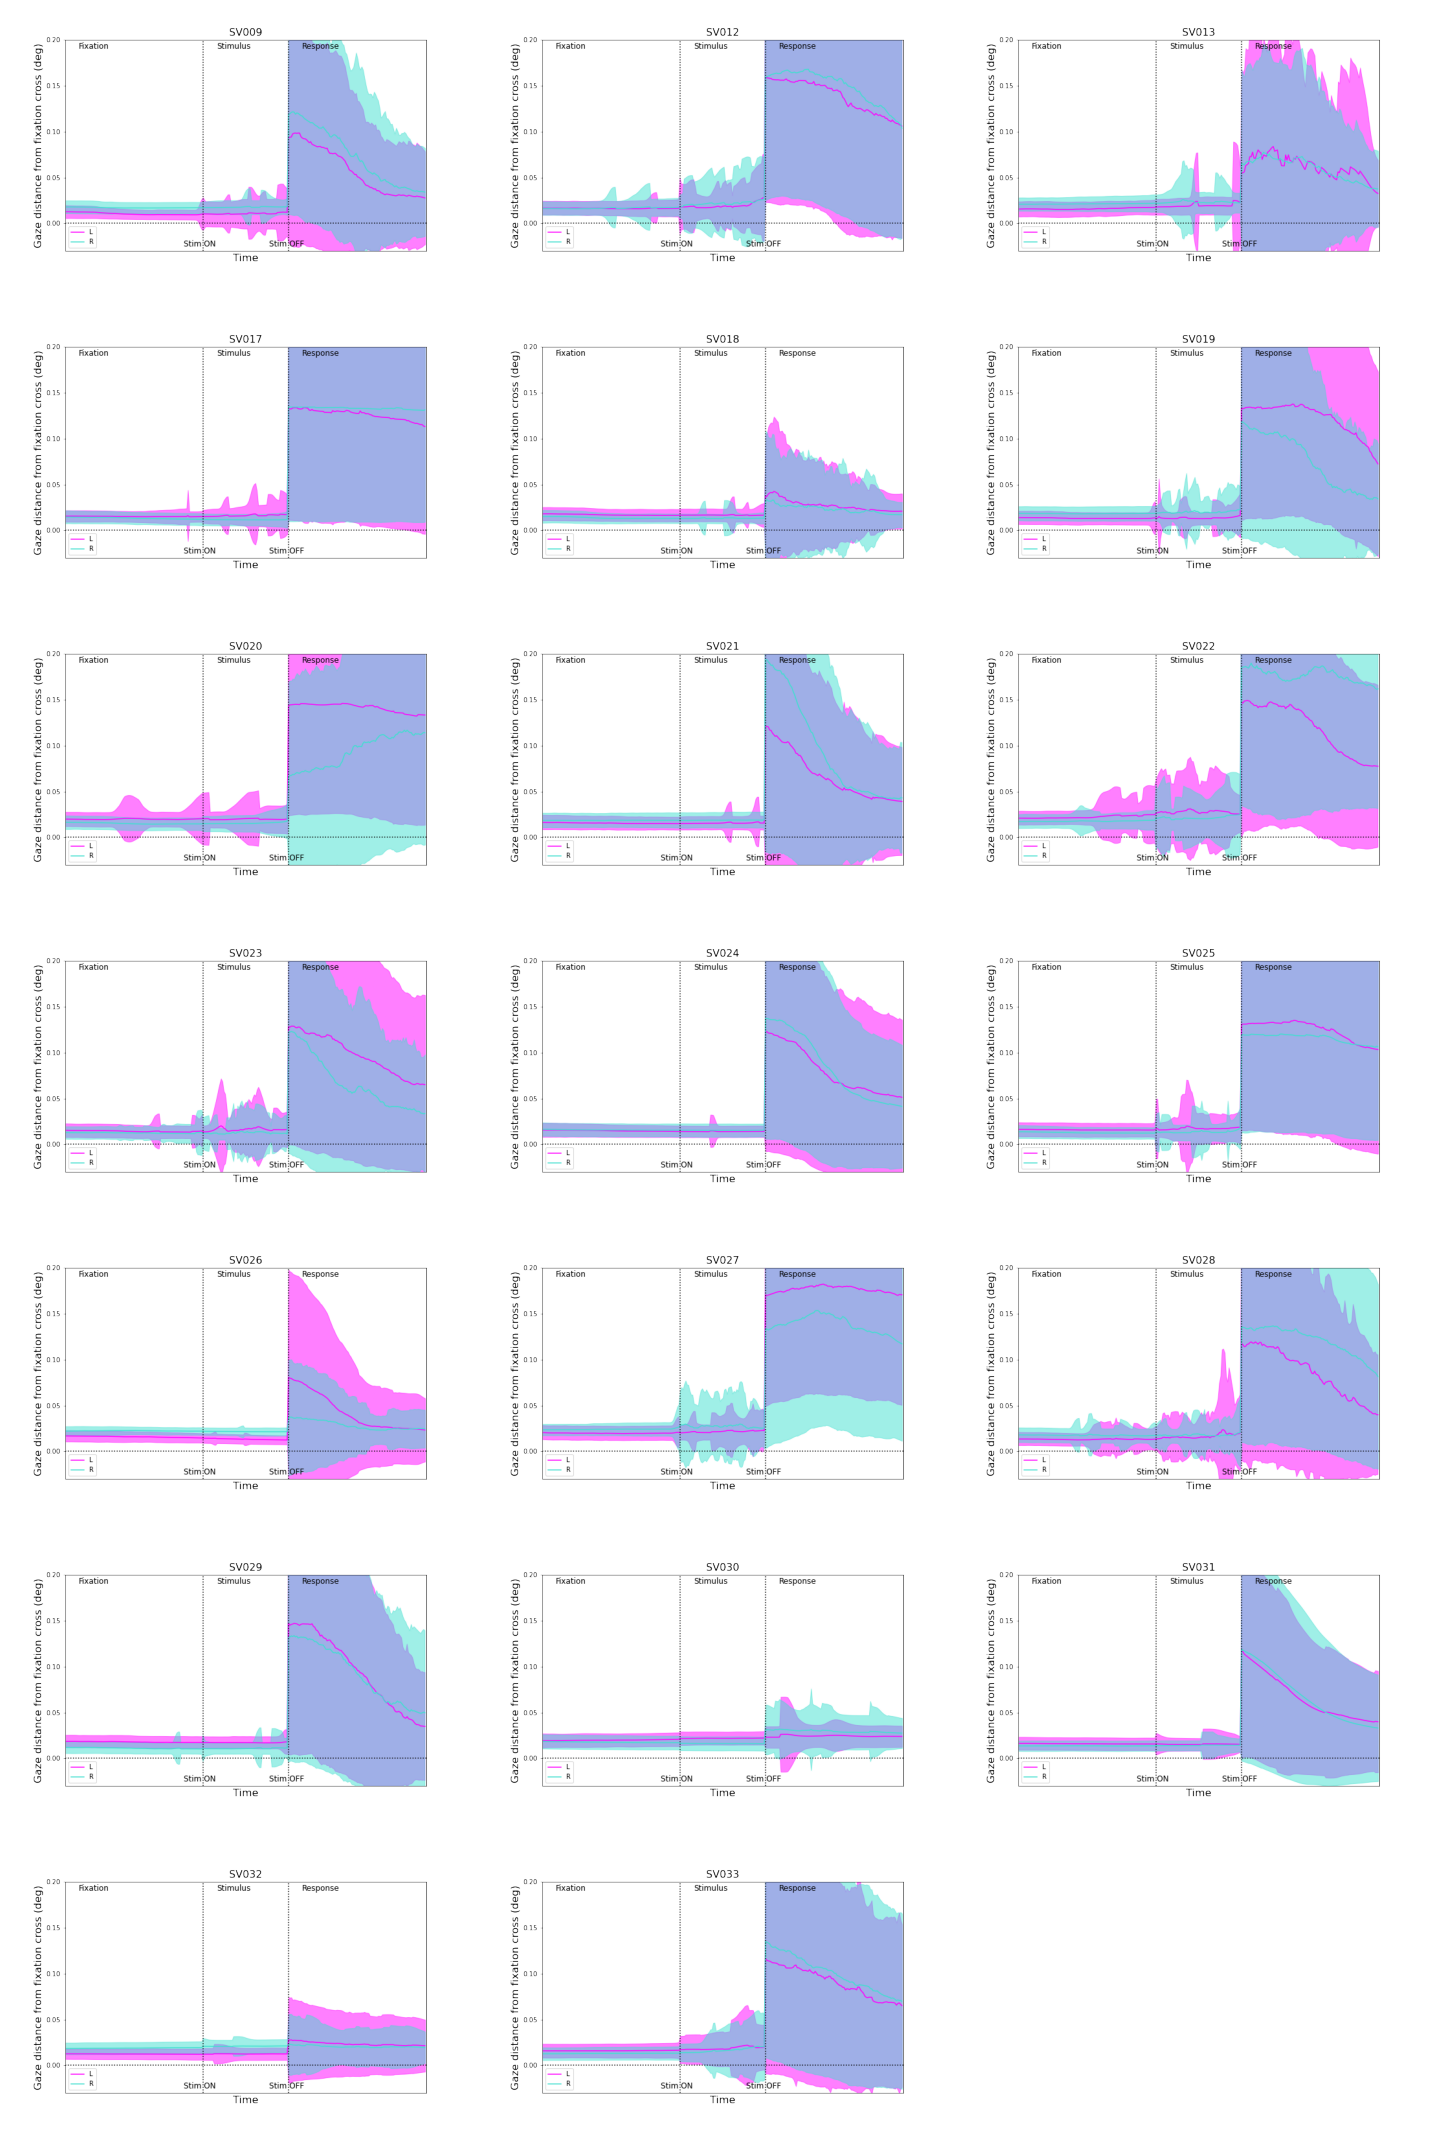

In [10]:
# Make an array of individual plots
nCols = 3
nRows = 7
fig, axs = plt.subplots(nRows, nCols, figsize=(20, 30))

# just read the png files
# sort subjectIDs
subjectIDs.sort()
for i, sid in enumerate(subjectIDs):
    img = plt.imread(os.path.join(plotDir, 'indiv', sid + '.png'))
    row = i // nCols
    col = i % nCols
    axs[row, col].imshow(img)
    axs[row, col].axis('off')
    # axs[row, col].set_title(sid)

# Remove the last subplot (21st subplot)
fig.delaxes(axs[6, 2])

# Adjust spacing
plt.tight_layout()
plt.savefig(os.path.join(plotDir, 'indiv_plots.png'))
    

## Extras: Group gaze data

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store group data
group_fix = {'L': [], 'R': []}
group_stim = {'L': [], 'R': []}
group_resp = {'L': [], 'R': []}

subjectIDs = list(set([file.split('L_')[0] for file in os.listdir(outDir) if file.endswith('Message.csv') and 'L' in file]))

for sid in subjectIDs:
    for eye in ['L', 'R']:
        timeStampFiles = [file for file in os.listdir(outDir) if file.endswith('timeStamps.csv') and sid + eye in file]
        sampFiles = [file for file in os.listdir(outDir) if file.endswith('Sample.csv') and sid + eye in file]

        if len(timeStampFiles) == 1:
            ts_df = pd.read_csv(os.path.join(outDir, timeStampFiles[0]))
            samp_df = pd.read_csv(os.path.join(outDir, sampFiles[0]))            
        else:
            for ts_file in timeStampFiles:
                # skip if number of trials == 8
                ts_df = pd.read_csv(os.path.join(outDir, ts_file))
                if ts_df['trialID'].size == 8:
                    continue
                else:
                    sampFile = [file for file in sampFiles if ts_file.split('_timeStamps')[0] in file][0]
                    samp_df = pd.read_csv(os.path.join(outDir, sampFile))
        
        # Fixation duration = 500ms, recorded at 500 Hz, monocular viewing -> every other sample -> 125 samples
        fix_samps_x, fix_samps_y = getXYarray(ts_df, samp_df, 100, ['fixStart', 'fixEnd'], eye)
        stim_samps_x, stim_samps_y = getXYarray(ts_df, samp_df, 100, ['stimStart', 'stimEnd'], eye)
        resp_samps_x, resp_samps_y = getXYarray(ts_df, samp_df, 100, ['respStart', 'respEnd'], eye)

        fix = getNormDistFromCenter(fix_samps_x, fix_samps_y)
        stim = getNormDistFromCenter(stim_samps_x, stim_samps_y)
        resp = getNormDistFromCenter(resp_samps_x, resp_samps_y)

        mean_fix = np.mean(fix, axis=0)
        mean_stim = np.mean(stim, axis=0)
        mean_resp = np.mean(resp, axis=0)

        group_fix[eye].append(mean_fix)
        group_stim[eye].append(mean_stim)
        group_resp[eye].append(mean_resp)

# Find the minimum length of the arrays
for eye in ['L', 'R']:
    # fix
    min_length = min(len(arr) for arr in group_fix[eye])
    group_fix[eye] = np.array([arr[-min_length:] for arr in group_fix[eye]])
    print(group_fix[eye].shape)
    # stim
    min_length = min(len(arr) for arr in group_stim[eye])
    group_stim[eye] = np.array([arr[-min_length:] for arr in group_stim[eye]])
    print(group_stim[eye].shape)
    # resp
    min_length = min(len(arr) for arr in group_resp[eye])
    group_resp[eye] = np.array([arr[-min_length:] for arr in group_resp[eye]])
    print(group_resp[eye].shape)




(20, 100)
(20, 62)
(20, 100)
(20, 100)
(20, 62)
(20, 100)


distance from center during fixation:  0.016137266346494532
std:  0.002792952441811918
distance from center during stimulus:  0.017213165558589684
std:  0.003902833173053525
distance from center during fixation:  0.016569098561876477
std:  0.003410892001335538
distance from center during stimulus:  0.017490893317119616
std:  0.004314378581277044


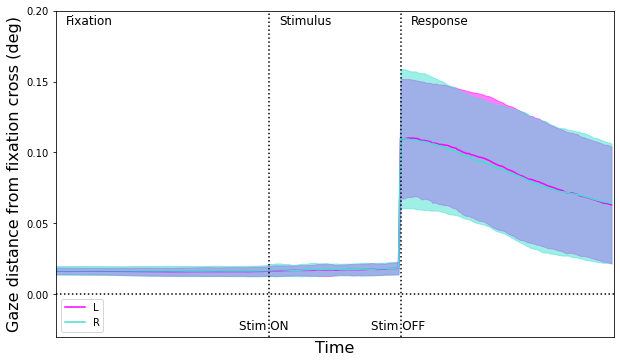

In [12]:
# Plot group data
plt.figure(figsize=(10, 6))

for eye, color in zip(['L', 'R'], ['magenta', 'turquoise']):
    
    # Calculate mean and standard deviation
    mean_fix = np.mean(group_fix[eye], axis=0)
    std_fix = np.std(group_fix[eye], axis=0)
    mean_stim = np.mean(group_stim[eye], axis=0)
    std_stim = np.std(group_stim[eye], axis=0)
    mean_resp = np.mean(group_resp[eye], axis=0)
    std_resp = np.std(group_resp[eye], axis=0)

    x_values = np.arange(mean_fix.size + mean_stim.size + mean_resp.size)

    plt.plot(x_values, np.concatenate((mean_fix, mean_stim, mean_resp)), label=eye, color=color)
    print("distance from center during fixation: ", mean_fix.mean())
    print("std: ", std_fix.mean())
    print("distance from center during stimulus: ", mean_stim.mean())
    print("std: ", std_stim.mean())
    plt.fill_between(x_values, np.concatenate((mean_fix - std_fix, mean_stim - std_stim, mean_resp - std_resp)), np.concatenate((mean_fix + std_fix, mean_stim + std_stim, mean_resp + std_resp)), color=color, alpha=0.5)

ymin = -.03
ymax = .2
plt.ylim(ymin, ymax)
# Add dotted lines to indicate stimulus onset and offset
plt.axvline(x=mean_fix.size, color='black', linestyle='dotted')
plt.axvline(x=mean_fix.size + mean_stim.size, color='black', linestyle='dotted')
plt.axhline(y=0, color='black', linestyle=':')
x_offset = -14
y_offset = ymin+0.005
plt.text(mean_fix.size+x_offset, y_offset, 'Stim ON', color='black', fontsize=12)
plt.text(mean_fix.size+mean_stim.size+x_offset, y_offset, 'Stim OFF', color='black', fontsize=12)

x_offset = 5
y_offset = ymax-.01
plt.text(0+x_offset, y_offset, 'Fixation', color='black', fontsize=12)
plt.text(mean_fix.size+x_offset, y_offset, 'Stimulus', color='black', fontsize=12)
plt.text(mean_fix.size+mean_stim.size+x_offset, y_offset, 'Response', color='black', fontsize=12)

# Set the x-axis and y-axis to start at 0
plt.xlim(left=0, right=mean_fix.size+mean_stim.size+mean_resp.size)

# plt.ylim(bottom=0)
plt.xticks([])
# plt.title('Group (N = %d)'%len(subjectIDs), fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Gaze distance from fixation cross (deg)', fontsize=16)
plt.legend(loc='lower left') 

# Save figure
plt.savefig(os.path.join(plotDir, 'group.png'))
plt.show()